In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [14]:
X = df.iloc[:,0:8]                 # INDEPENDENT VALUES
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
y = df.iloc[:,-1]                  # TARGET VALUE/ATTRIBUTE "OUTCOME"
y                  

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Feature selection is the process of selecting suitable attributes in the dataset that plays an importent role in model construction

# Two methods of Feature selection:-

# 1. Univariate Selection
Univariate Selection used to select those features that have the strongest relationship with the output variable.

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)

In [28]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [36]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Attributes','Score']

In [37]:
featureScores

,Attributes,Score
0,Pregnancies,111.519691
1,Glucose,1411.887041
2,BloodPressure,17.605373
3,SkinThickness,53.108040
4,Insulin,2175.565273
5,BMI,127.669343
6,DiabetesPedigreeFunction,5.392682
7,Age,181.303689


In [38]:
print(featureScores.nlargest(8,'Score'))

                 Attributes        Score
4                   Insulin  2175.565273
1                   Glucose  1411.887041
7                       Age   181.303689
5                       BMI   127.669343
0               Pregnancies   111.519691
3             SkinThickness    53.108040
2             BloodPressure    17.605373
6  DiabetesPedigreeFunction     5.392682


# 2. Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

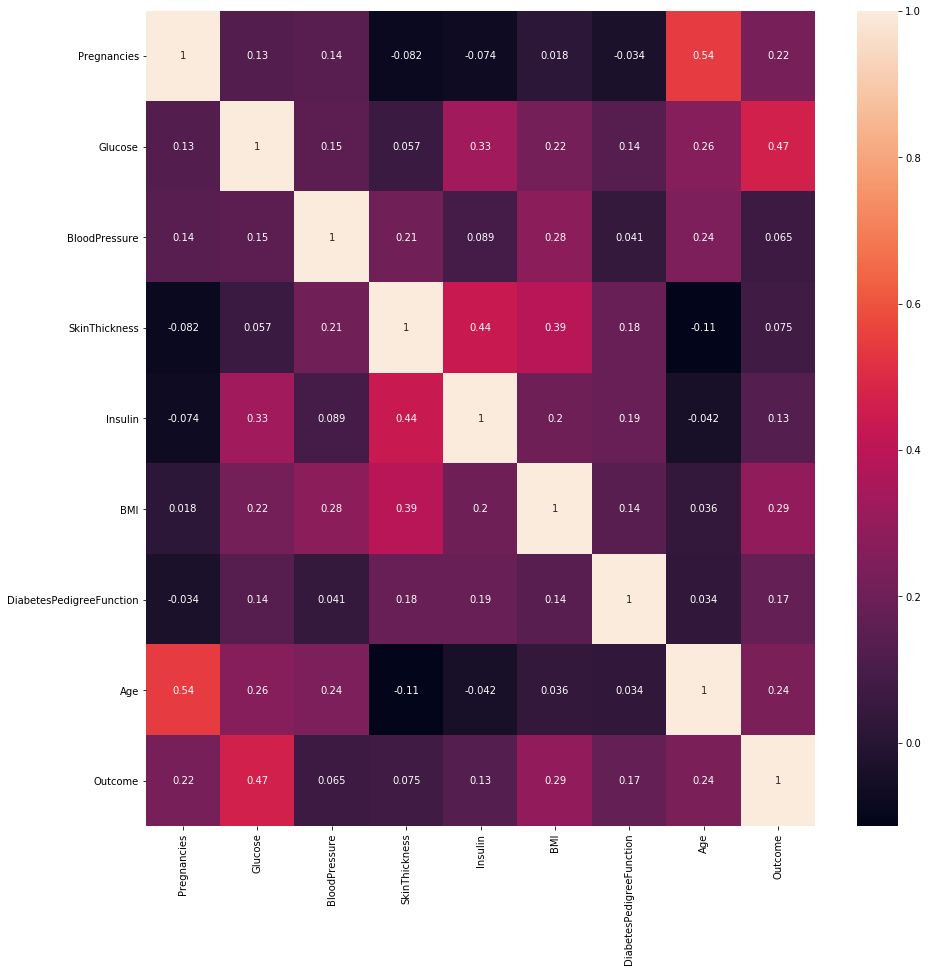

In [44]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store selected features
selected_features = []
best_accuracy = 0

# Create a Logistic Regression model
model = LogisticRegression()

# Perform forward selection
for i in range(X_train.shape[1]):
    candidate_features = [feature for feature in range(X_train.shape[1]) if feature not in selected_features]
    temp_best_accuracy = 0
    best_feature = None
    for feature in candidate_features:
        # Add a feature and train the model
        current_features = selected_features + [feature]
        model.fit(X_train[:, current_features], y_train)
        y_pred = model.predict(X_test[:, current_features])
        accuracy = accuracy_score(y_test, y_pred)
        # Check if adding this feature improves the accuracy
        if accuracy > temp_best_accuracy:
            temp_best_accuracy = accuracy
            best_feature = feature
    # If adding a feature improves the accuracy, add it to the selected features
    if temp_best_accuracy > best_accuracy:
        best_accuracy = temp_best_accuracy
        selected_features.append(best_feature)
    else:
        # If no feature improves the accuracy, break the loop
        break

print("Selected features:", selected_features)
print("Best accuracy:", best_accuracy)
